In [1]:
import os
import csv
import numpy as np
from pathlib import Path
from pprint import pprint
import matplotlib.pyplot as plt

from sturdr.utils.results import *
from sturdr.utils.coordinates import ecef2lla
from sturdr.utils.constants import GPS_L1CA_CODE_FREQ, GPS_L1CA_CARRIER_FREQ, LIGHT_SPEED

LAMBDA = LIGHT_SPEED / GPS_L1CA_CARRIER_FREQ
BETA = LIGHT_SPEED / GPS_L1CA_CODE_FREQ

path = Path('..')

{'State': <class 'str'>, 'CodeLock': <class 'bool'>, 'CarrierLock': <class 'bool'>, 'DataLock': <class 'bool'>, 'Ephemeris': <class 'bool'>, 'Week': <class 'float'>, 'ToW': <class 'float'>, 'CNo': <class 'float'>, 'Doppler': <class 'float'>, 'CodePhase': <class 'float'>, 'CarrierPhase': <class 'float'>, 'IP': <class 'float'>, 'QP': <class 'float'>, 'IE': <class 'float'>, 'QE': <class 'float'>, 'IL': <class 'float'>, 'QL': <class 'float'>, 'IP_1': <class 'float'>, 'QP_1': <class 'float'>, 'IP_2': <class 'float'>, 'QP_2': <class 'float'>}
-339.7653359293495
90.82037063913788
-682.481385624689
-623.729753765163
-955.1242671915569
65.21329946601688
-287.5501123983008


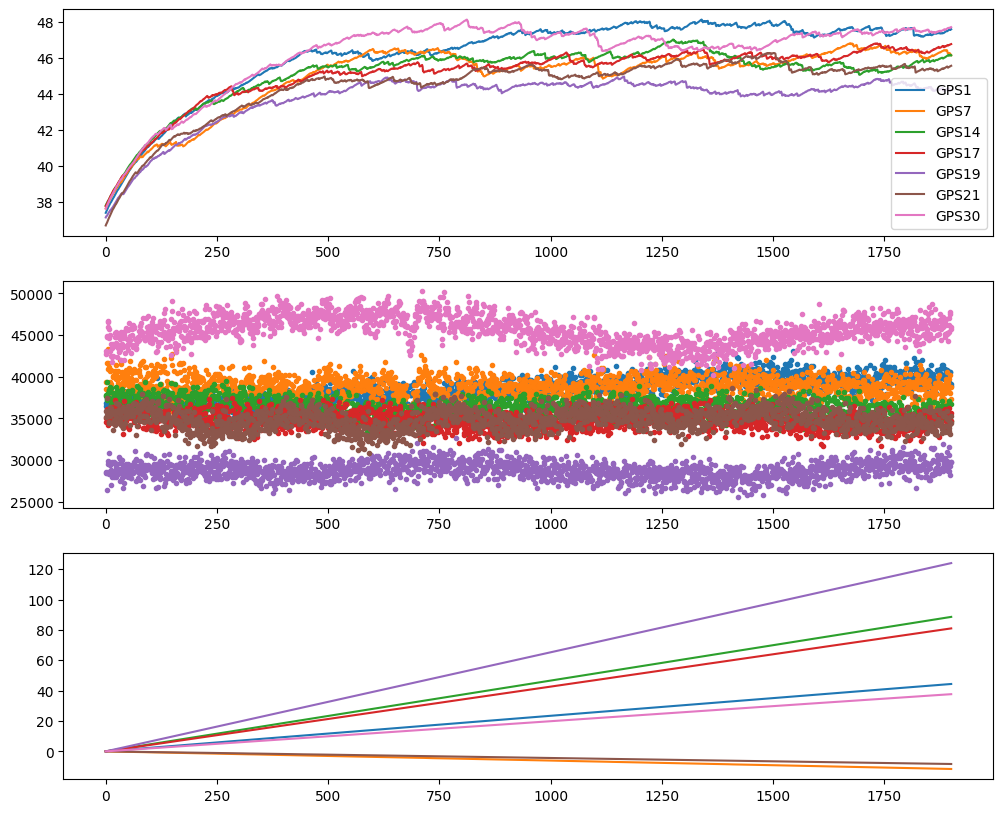

In [2]:
filename = path / "results" / "GPS_L1CA_TEST_ChannelStatus.csv"
results = ParseChannelResults(filename)
# pprint(results[0]['DataLock'])

f, ax = plt.subplots(3,1,figsize=(12,10))
for i in results.keys():
    ax[0].plot(results[i]['CNo'][100:], label=results[i]['ID'])
    ax[1].plot([np.sqrt(x**2 + y**2) for x,y in zip(results[i]['IP'][100:], results[i]['QP'][100:])], '.', label=results[i]['ID'])
    ax[2].plot(np.asarray(results[i]['CodePhase'][100:])-results[i]['CodePhase'][100], label=results[i]['ID'])
    print(-BETA * np.mean(np.diff(results[i]['CodePhase'][-300:]) / np.diff(results[i]['ToW'][-300:])))
ax[0].legend()

In [3]:
filename = path / "results" / "GPS_L1CA_TEST_Navigation.csv"
results = ParseNavigationResults(filename)
print(results)

lla = np.asarray([ecef2lla([x,y,z]) for x,y,z in zip(results['x'], results['y'], results['z'])])
print(f"{np.array2string(lla, precision=10, separator=',')}")

filename = path / "results" / "GPS_L1CA_TEST_LLA.csv"
np.savetxt(filename, lla, delimiter=',', header='latitude,longitude,altitude', fmt='%.12f', comments='')
# numpy.savetxt(fname, X, delimiter=' ', header='')

{'GpsWeek': [205.0, 205.0, 205.0, 205.0, 205.0, 205.0, 205.0, 205.0, 205.0, 205.0, 205.0, 205.0, 205.0, 205.0, 205.0, 205.0, 205.0, 205.0, 205.0, 205.0, 205.0, 205.0, 205.0, 205.0, 205.0, 205.0, 205.0, 205.0, 205.0, 205.0, 205.0, 205.0, 205.0, 205.0, 205.0, 205.0, 205.0, 205.0, 205.0, 205.0, 205.0, 205.0, 205.0, 205.0, 205.0, 205.0, 205.0, 205.0, 205.0, 205.0, 205.0, 205.0, 205.0, 205.0, 205.0, 205.0, 205.0, 205.0, 205.0, 205.0, 205.0, 205.0, 205.0, 205.0, 205.0, 205.0, 205.0, 205.0, 205.0, 205.0, 205.0, 205.0, 205.0, 205.0, 205.0, 205.0, 205.0, 205.0, 205.0, 205.0, 205.0, 205.0, 205.0, 205.0, 205.0, 205.0, 205.0, 205.0, 205.0, 205.0, 205.0, 205.0, 205.0, 205.0, 205.0, 205.0, 205.0, 205.0, 205.0, 205.0, 205.0, 205.0, 205.0, 205.0, 205.0, 205.0, 205.0, 205.0, 205.0, 205.0, 205.0, 205.0, 205.0, 205.0, 205.0, 205.0, 205.0, 205.0, 205.0, 205.0, 205.0, 205.0, 205.0, 205.0, 205.0, 205.0, 205.0, 205.0, 205.0, 205.0, 205.0, 205.0, 205.0, 205.0, 205.0, 205.0, 205.0, 205.0, 205.0, 205.0, 205.0, 